In [ ]:
!pip install datasets
!pip install pip install accelerate -U
exit()

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 542.0/542.0 kB 6.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 7.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.1/2.1 MB 9.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 302.6/302.6 kB 17.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrt

In [ ]:
import torch

from datasets import load_dataset, Dataset, DatasetDict, load_metric
from transformers import AutoTokenizer, DataCollatorWithPadding, TrainingArguments, AutoModelForSequenceClassification

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Training Tokenizer

In [ ]:
raw_dataset = pd.read_csv('drive/MyDrive/combined.csv')

In [ ]:
raw_dataset.drop_duplicates(inplace = True)

In [ ]:
raw_dataset.head()

title  \
0  ‡•õ‡§ø‡§Æ‡•ç‡§Æ‡•á‡§¶‡§æ‡§∞‡•Ä ‡§°‡•ç‡§∞‡§æ‡§á‡§µ‡§∞ ‡§≤‡•á‡§ó‡§æ: ‡§¨‡•á‡§ü‡•á ‡§ï‡•á ‡§ï‡§æ‡§´‡§ø‡§≤‡•á ‡§ï‡•Ä ‡§ï‡§æ‡§∞...   
1  ‡§ú‡§Æ‡•ç‡§Æ‡•Ç-‡§ï‡§∂‡•ç‡§Æ‡•Ä‡§∞ ‡§Æ‡•á‡§Ç ‡§ó‡§π‡§∞‡•Ä ‡§ñ‡§æ‡§à ‡§Æ‡•á‡§Ç ‡§ó‡§ø‡§∞‡•Ä ‡§¨‡§∏, 10 ‡§Ø‡§æ‡§§‡•ç...   
2  ‡§Æ‡•Å‡§Ç‡§¨‡§à ‡§ï‡•á ‡§π‡•ã‡§ü‡§≤ ‡§ï‡§æ‡§∞‡•ã‡§¨‡§æ‡§∞‡•Ä ‡§Æ‡§∞‡•ç‡§°‡§∞ ‡§ï‡•á‡§∏ ‡§Æ‡•á‡§Ç ‡§°‡•â‡§® ‡§õ‡•ã‡§ü‡§æ ...   
3  ‡§™‡•ç‡§∞‡§ú‡•ç‡§µ‡§≤ ‡§µ‡§æ‡§™‡§∏ ‡§®‡§π‡•Ä‡§Ç ‡§≤‡•å‡§ü‡•á ‡§§‡•ã ‡§â‡§®‡§ï‡•á ‡§™‡§æ‡§∏‡§™‡•ã‡§∞‡•ç‡§ü ‡§ï‡•ã ‡§∞‡§¶‡•ç...   
4  ‡§Æ‡§®‡•Ä ‡§≤‡•â‡§®‡•ç‡§°‡§∞‡§ø‡§Ç‡§ó ‡§ï‡•á‡§∏ ‡§Æ‡•á‡§Ç ‡§ù‡§æ‡§∞‡§ñ‡§Ç‡§° ‡§ï‡•á ‡§™‡•Ç‡§∞‡•ç‡§µ ‡§∏‡•Ä‡§è‡§Æ ‡§∏‡•ã‡§∞...   

                                             content     label  
0  ‡§ï‡•à‡§∏‡§∞‡§ó‡§Ç‡§ú (‡§Ø‡•Ç‡§™‡•Ä) ‡§∏‡•á ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä ‡§∏‡§æ‡§Ç‡§∏‡§¶ ‡§¨‡•É‡§ú‡§≠‡•Ç‡§∑‡§£ ‡§∂‡§∞‡§£ ‡§∏‡§ø‡§Ç...  national  
1  ‡§Ö‡§ñ‡§®‡•Ç‡§∞ (‡§ú‡§Æ‡•ç‡§Æ‡•Ç-‡§ï‡§∂‡•ç‡§Æ‡•Ä‡§∞) ‡§Æ‡•á‡§Ç ‡§ó‡•Å‡§∞‡•Å‡§µ‡§æ‡§∞ ‡§ï‡•ã ‡§Ø‡§æ‡§§‡•ç‡§∞‡§ø‡§Ø‡•ã‡§Ç ...  national  
2  ‡§Æ‡•Å‡§Ç‡§¨‡§à ‡§Æ‡•á‡§Ç ‡§π‡•ã‡§ü‡§≤ ‡§µ‡•ç‡§Ø‡§µ‡§∏‡§æ‡§Ø‡•Ä ‡§ú‡§Ø ‡§∂‡•á‡§ü‡•ç‡§ü‡•Ä ‡§ï‡•Ä ‡§π‡§§‡•ç‡§Ø‡§æ ‡§ï‡•á ...  national  
3  ‡§ï‡§∞‡•ç‡§®‡§æ‡§ü‡§ï ‡§ï‡•á ‡§ó‡•É‡§π ‡§Æ‡§Ç‡§§‡•ç‡§∞‡•Ä ‡§ú‡•Ä ‡§™‡§∞‡§Æ‡•á‡§∂‡•ç‡§µ‡§∞ ‡§®‡•á ‡§ï‡§π‡§æ ‡§π‡•à ‡§ï‡§ø...  national  
4  ‡§∞‡§æ‡§Ç‡§ö‡•Ä (‡§ù‡§æ‡§∞‡§ñ‡§Ç‡§°) ‡§∏‡•ç‡§•‡§ø‡§§ ‡§™‡•Ä‡§è‡§Æ‡§è‡§≤‡§è ‡§ï‡•á ‡§∏‡•ç‡§™‡•á‡§∂‡§≤ ‡§ï‡•ã‡§∞‡•ç‡§ü ‡§®...  national

In [ ]:
raw_dataset['label'].unique()

array(['politics', 'sports', 'technology'], dtype=object)

In [ ]:
raw_dataset.reset_index(inplace = True, drop = True)

In [ ]:
raw_dataset.head()

title  \
0  ‡§™‡•ç‡§∞‡§ø‡§Ø ‡§Ö‡§Æ‡§ø‡§§‡§æ‡§≠, ‡§á‡§∏ ‡§¨‡§æ‡§∞‡•á ‡§Æ‡•á‡§Ç ‡§ü‡•ç‡§µ‡•Ä‡§ü ‡§ï‡§∞ ‡§Æ‡§¶‡§¶ ‡§ï‡§∞‡•á‡§Ç: ‡§Ø...   
1  ‡§¨‡§Ç‡§ó‡§æ‡§≤ ‡§Æ‡•á‡§Ç ‡§≤‡•ã‡§ï‡§∏‡§≠‡§æ ‡§ö‡•Å‡§®‡§æ‡§µ ‡§≤‡§°‡§º ‡§∞‡§π‡•á 507 ‡§â‡§Æ‡•ç‡§Æ‡•Ä‡§¶‡§µ‡§æ‡§∞‡•ã‡§Ç...   
2  ‡§ö‡§Ç‡§°‡•Ä‡§ó‡•ù ‡§Æ‡•á‡§Ç ‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏ ‡§™‡•ç‡§∞‡§§‡•ç‡§Ø‡§æ‡§∂‡•Ä ‡§Æ‡§®‡•Ä‡§∑ ‡§§‡§ø‡§µ‡§æ‡§∞‡•Ä ‡§µ ‡§¨‡§∏...   
3  ‡§Æ‡§π‡§æ‡§ï‡§æ‡§≤ ‡§ï‡•á ‡§¶‡§∞‡•ç‡§∂‡§® ‡§ï‡§∞‡§®‡•á ‡§ï‡•á ‡§¨‡§æ‡§¶ ‡§ú‡•ç‡§Ø‡•ã‡§§‡§ø‡§∞‡§æ‡§¶‡§ø‡§§‡•ç‡§Ø ‡§∏‡§ø‡§Ç‡§ß...   
4  Jammu and Kashmir: ‡§∂‡•ç‡§∞‡•Ä‡§®‡§ó‡§∞ ‡§Æ‡•á‡§Ç ED ‡§ï‡•Ä ‡§¨‡§°‡§º‡•Ä ‡§ï‡§æ‡§∞‡•ç...   

                                             content     label  
0  ‡§ï‡•á‡§∞‡§≤ ‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏ ‡§®‡•á ‡§Ø‡•Ç‡§™‡•Ä ‡§Æ‡•á‡§Ç ‡§ñ‡§ö‡§æ‡§ñ‡§ö ‡§≠‡§∞‡•Ä ‡§è‡§ï ‡§ü‡•ç‡§∞‡•á‡§® ‡§ï...  politics  
1  '‡§™‡§∂‡•ç‡§ö‡§ø‡§Æ ‡§¨‡§Ç‡§ó‡§æ‡§≤ ‡§á‡§≤‡•á‡§ï‡•ç‡§∂‡§® ‡§µ‡•â‡§ö' ‡§î‡§∞ ‡§è‡§°‡•Ä‡§Ü‡§∞ ‡§¶‡•ç‡§µ‡§æ‡§∞‡§æ ‡§ï‡•Ä ...  politics  
2  ‡§ö‡§Ç‡§°‡•Ä‡§ó‡•ù ‡§Æ‡•á‡§Ç ‡§ó‡•Å‡§∞‡•Å‡§µ‡§æ‡§∞ ‡§ï‡•ã ‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏ ‡§™‡•ç‡§∞‡§§‡•ç‡§Ø‡§æ‡§∂‡•Ä ‡§Æ‡§®‡•Ä‡§∑ ...  politics  
3  ‡§≠‡•ã‡§™‡§æ‡§≤: ‡§ï‡•á‡§Ç‡§¶‡•ç‡§∞‡•Ä‡§Ø ‡§Æ‡§Ç‡§§‡•ç‡§∞‡•Ä ‡§ú‡•ç‡§Ø‡•ã‡§§‡§ø‡§∞‡§æ‡§¶‡§ø‡§§‡•ç‡§Ø ‡§∏‡§ø‡§Ç‡§ß‡§ø‡§Ø‡§æ ‡§®...  politics  
4  ‡§∂‡•ç‡§∞‡•Ä‡§®‡§ó‡§∞: ‡§™‡•ç‡§∞‡§µ‡§∞‡•ç‡§§‡§® ‡§®‡§ø‡§¶‡•á‡§∂‡§æ‡§≤‡§Ø (‡§à‡§°‡•Ä) ‡§®‡•á ‡§ú‡§Æ‡•ç‡§Æ‡•Ç-‡§ï‡§∂‡•ç‡§Æ...  politics

In [ ]:
raw_dataset.isna().sum()

title      0
content    0
label      0
dtype: int64

In [ ]:
raw_dataset['train'] = raw_dataset.progress_apply(lambda x : x['title'] + ' | ' + x['content'], axis = 1)

  0%|          | 0/5932 [00:00<?, ?it/s]

In [ ]:
raw_dataset['train']

0       ‡•õ‡§ø‡§Æ‡•ç‡§Æ‡•á‡§¶‡§æ‡§∞‡•Ä ‡§°‡•ç‡§∞‡§æ‡§á‡§µ‡§∞ ‡§≤‡•á‡§ó‡§æ: ‡§¨‡•á‡§ü‡•á ‡§ï‡•á ‡§ï‡§æ‡§´‡§ø‡§≤‡•á ‡§ï‡•Ä ‡§ï‡§æ‡§∞...
1       ‡§ú‡§Æ‡•ç‡§Æ‡•Ç-‡§ï‡§∂‡•ç‡§Æ‡•Ä‡§∞ ‡§Æ‡•á‡§Ç ‡§ó‡§π‡§∞‡•Ä ‡§ñ‡§æ‡§à ‡§Æ‡•á‡§Ç ‡§ó‡§ø‡§∞‡•Ä ‡§¨‡§∏, 10 ‡§Ø‡§æ‡§§‡•ç...
2       ‡§Æ‡•Å‡§Ç‡§¨‡§à ‡§ï‡•á ‡§π‡•ã‡§ü‡§≤ ‡§ï‡§æ‡§∞‡•ã‡§¨‡§æ‡§∞‡•Ä ‡§Æ‡§∞‡•ç‡§°‡§∞ ‡§ï‡•á‡§∏ ‡§Æ‡•á‡§Ç ‡§°‡•â‡§® ‡§õ‡•ã‡§ü‡§æ ...
3       ‡§™‡•ç‡§∞‡§ú‡•ç‡§µ‡§≤ ‡§µ‡§æ‡§™‡§∏ ‡§®‡§π‡•Ä‡§Ç ‡§≤‡•å‡§ü‡•á ‡§§‡•ã ‡§â‡§®‡§ï‡•á ‡§™‡§æ‡§∏‡§™‡•ã‡§∞‡•ç‡§ü ‡§ï‡•ã ‡§∞‡§¶‡•ç...
4       ‡§Æ‡§®‡•Ä ‡§≤‡•â‡§®‡•ç‡§°‡§∞‡§ø‡§Ç‡§ó ‡§ï‡•á‡§∏ ‡§Æ‡•á‡§Ç ‡§ù‡§æ‡§∞‡§ñ‡§Ç‡§° ‡§ï‡•á ‡§™‡•Ç‡§∞‡•ç‡§µ ‡§∏‡•Ä‡§è‡§Æ ‡§∏‡•ã‡§∞...
                              ...                        
9886    ‡§Ö‡§Æ‡•á‡§∞‡§ø‡§ï‡§æ ‡§®‡•á ‡§Ö‡§™‡§®‡•á ‡§ï‡•ç‡§∑‡•á‡§§‡•ç‡§∞‡§´‡§≤ ‡§Æ‡•á‡§Ç ‡§ï‡§ø‡§Ø‡§æ ‡§∏‡•ç‡§™‡•á‡§® ‡§ï‡•á ‡§ï‡•ç...
9887    1 ‡§ú‡§®‡§µ‡§∞‡•Ä ‡§ï‡•ã ‡§Ü‡§è ‡§∂‡§ï‡•ç‡§§‡§ø‡§∂‡§æ‡§≤‡•Ä ‡§≠‡•Ç‡§ï‡§Ç‡§™ ‡§ï‡•á ‡§¨‡§æ‡§¶ ‡§ú‡§æ‡§™‡§æ‡§® ‡§Æ‡•á‡§Ç...
9888    ‡§¨‡•á‡§Ç‡

In [ ]:
training_corpus = [raw_dataset["train"][i: i + 1000] for i in range(0, len(raw_dataset["train"]), 1000)]

In [ ]:
old_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
tokenizer = old_tokenizer.train_new_from_iterator(training_corpus, 30522)

In [ ]:
tokens = tokenizer.tokenize('‡§â‡§Æ‡•ç‡§Æ‡•Ä‡§¶ ‡§ï‡•á ‡§Æ‡•Å‡§§‡§æ‡§¨‡§ø‡§ï 11.6-‡§á‡§Ç‡§ö ‡§°‡§ø‡§∏‡•ç‡§™‡•ç‡§≤‡•á ‡§∏‡§æ‡§á‡§ú‡§º ‡§ï‡•á ‡§π‡§ø‡§∏‡§æ‡§¨ ‡§∏‡•á ‡§µ‡§ø‡§µ‡•ã‡§¨‡•Å‡§ï ‡§è‡§´202‡§à ‡§ï‡§æ‡§´‡•Ä ‡§ï‡•â‡§Æ‡•ç‡§™‡•à‡§ï‡•ç‡§ü ‡§π‡•à‡•§')
tokens

['‡§â‡§Æ‡§Æ‡•Ä‡§¶',
 '‡§ï',
 '‡§Æ‡§§‡§æ‡§¨‡§ø‡§ï',
 '11',
 '.',
 '6',
 '-',
 '‡§á‡§ö',
 '‡§°‡§ø‡§∏‡§™‡§≤',
 '‡§∏‡§æ‡§á‡§ú',
 '‡§ï',
 '‡§π‡§ø‡§∏‡§æ‡§¨',
 '‡§∏',
 '‡§µ‡§ø',
 '##‡§µ‡•ã',
 '##‡§¨‡§ï',
 '‡§è‡§´',
 '##20',
 '##2',
 '##‡§à',
 '‡§ï‡§æ‡§´‡•Ä',
 '‡§ï‡•â‡§Æ‡§™',
 '##‡§ï‡§ü',
 '‡§π',
 '‡•§']

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
tokenizer.push_to_hub("3-classes-tokenizer-hindi-politics-sports-technology")

CommitInfo(commit_url='https://huggingface.co/jaskaran277/3-classes-tokenizer-hindi-politics-sports-technology/commit/40af73ffc3ef69b8854616f578141469006a3c47', commit_message='Upload tokenizer', commit_description='', oid='40af73ffc3ef69b8854616f578141469006a3c47', pr_url=None, pr_revision=None, pr_num=None)

# DataLoading

In [ ]:
df = pd.read_csv('drive/MyDrive/combined.csv')

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.head()

title  \
0  ‡§™‡•ç‡§∞‡§ø‡§Ø ‡§Ö‡§Æ‡§ø‡§§‡§æ‡§≠, ‡§á‡§∏ ‡§¨‡§æ‡§∞‡•á ‡§Æ‡•á‡§Ç ‡§ü‡•ç‡§µ‡•Ä‡§ü ‡§ï‡§∞ ‡§Æ‡§¶‡§¶ ‡§ï‡§∞‡•á‡§Ç: ‡§Ø...   
1  ‡§¨‡§Ç‡§ó‡§æ‡§≤ ‡§Æ‡•á‡§Ç ‡§≤‡•ã‡§ï‡§∏‡§≠‡§æ ‡§ö‡•Å‡§®‡§æ‡§µ ‡§≤‡§°‡§º ‡§∞‡§π‡•á 507 ‡§â‡§Æ‡•ç‡§Æ‡•Ä‡§¶‡§µ‡§æ‡§∞‡•ã‡§Ç...   
2  ‡§ö‡§Ç‡§°‡•Ä‡§ó‡•ù ‡§Æ‡•á‡§Ç ‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏ ‡§™‡•ç‡§∞‡§§‡•ç‡§Ø‡§æ‡§∂‡•Ä ‡§Æ‡§®‡•Ä‡§∑ ‡§§‡§ø‡§µ‡§æ‡§∞‡•Ä ‡§µ ‡§¨‡§∏...   
3  ‡§Æ‡§π‡§æ‡§ï‡§æ‡§≤ ‡§ï‡•á ‡§¶‡§∞‡•ç‡§∂‡§® ‡§ï‡§∞‡§®‡•á ‡§ï‡•á ‡§¨‡§æ‡§¶ ‡§ú‡•ç‡§Ø‡•ã‡§§‡§ø‡§∞‡§æ‡§¶‡§ø‡§§‡•ç‡§Ø ‡§∏‡§ø‡§Ç‡§ß...   
4  Jammu and Kashmir: ‡§∂‡•ç‡§∞‡•Ä‡§®‡§ó‡§∞ ‡§Æ‡•á‡§Ç ED ‡§ï‡•Ä ‡§¨‡§°‡§º‡•Ä ‡§ï‡§æ‡§∞‡•ç...   

                                             content     label  
0  ‡§ï‡•á‡§∞‡§≤ ‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏ ‡§®‡•á ‡§Ø‡•Ç‡§™‡•Ä ‡§Æ‡•á‡§Ç ‡§ñ‡§ö‡§æ‡§ñ‡§ö ‡§≠‡§∞‡•Ä ‡§è‡§ï ‡§ü‡•ç‡§∞‡•á‡§® ‡§ï...  politics  
1  '‡§™‡§∂‡•ç‡§ö‡§ø‡§Æ ‡§¨‡§Ç‡§ó‡§æ‡§≤ ‡§á‡§≤‡•á‡§ï‡•ç‡§∂‡§® ‡§µ‡•â‡§ö' ‡§î‡§∞ ‡§è‡§°‡•Ä‡§Ü‡§∞ ‡§¶‡•ç‡§µ‡§æ‡§∞‡§æ ‡§ï‡•Ä ...  politics  
2  ‡§ö‡§Ç‡§°‡•Ä‡§ó‡•ù ‡§Æ‡•á‡§Ç ‡§ó‡•Å‡§∞‡•Å‡§µ‡§æ‡§∞ ‡§ï‡•ã ‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏ ‡§™‡•ç‡§∞‡§§‡•ç‡§Ø‡§æ‡§∂‡•Ä ‡§Æ‡§®‡•Ä‡§∑ ...  politics  
3  ‡§≠‡•ã‡§™‡§æ‡§≤: ‡§ï‡•á‡§Ç‡§¶‡•ç‡§∞‡•Ä‡§Ø ‡§Æ‡§Ç‡§§‡•ç‡§∞‡•Ä ‡§ú‡•ç‡§Ø‡•ã‡§§‡§ø‡§∞‡§æ‡§¶‡§ø‡§§‡•ç‡§Ø ‡§∏‡§ø‡§Ç‡§ß‡§ø‡§Ø‡§æ ‡§®...  politics  
4  ‡§∂‡•ç‡§∞‡•Ä‡§®‡§ó‡§∞: ‡§™‡•ç‡§∞‡§µ‡§∞‡•ç‡§§‡§® ‡§®‡§ø‡§¶‡•á‡§∂‡§æ‡§≤‡§Ø (‡§à‡§°‡•Ä) ‡§®‡•á ‡§ú‡§Æ‡•ç‡§Æ‡•Ç-‡§ï‡§∂‡•ç‡§Æ...  politics

In [ ]:
df['train'] = df.progress_apply(lambda x : x['title'] + ' | ' + x['content'], axis = 1)

  0%|          | 0/5932 [00:00<?, ?it/s]

In [ ]:
X = df['train']
Y=LabelEncoder().fit_transform(df['label'])

<Axes: xlabel='label', ylabel='count'>

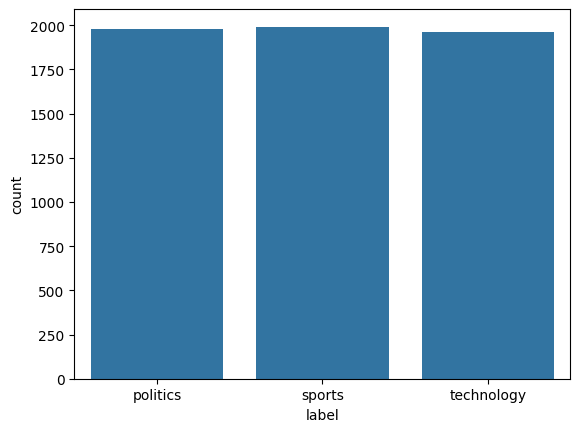

In [ ]:
sns.countplot(data = df, x = 'label')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42, test_size = 0.1, stratify = df['label'])

# Training

In [ ]:
tokenizer_checkpoint = 'jaskaran277/3-classes-tokenizer-hindi-politics-sports-technology'
tokenizer = AutoTokenizer.from_pretrained(tokenizer_checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/370k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/764k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
train_df = pd.DataFrame({
    "label" : Y_train,
    "text" : X_train
})
train_df.reset_index(drop=True, inplace=True)
train_df

label                                               text
0         1  ‡§ü‡•Ä20 ‡§µ‡§∞‡•ç‡§≤‡•ç‡§° ‡§ï‡§™ ‡§ú‡•Ä‡§§‡§®‡•á ‡§ï‡•á ‡§≤‡§ø‡§è ‡§¶‡•ç‡§∞‡§µ‡§ø‡•ú ‡§ï‡•ã ‡§ü‡•Ä‡§Æ ‡§Æ‡•á‡§Ç ...
1         2  ‡§ö‡§Ç‡§¶‡•ç‡§∞‡§Ø‡§æ‡§®-3 ‡§ï‡•á ‡§™‡•ç‡§∞‡§ú‡•ç‡§û‡§æ‡§® ‡§∞‡•ã‡§µ‡§∞ ‡§®‡•á ‡§ö‡§Ç‡§¶‡•ç‡§∞‡§Æ‡§æ ‡§ï‡•á ‡§¶‡§ï‡•ç‡§∑...
2         2  ‡§ü‡•ç‡§µ‡§ø‡§ü‡§∞ ‡§™‡§∞ 4 ‡§¶‡§ø‡§® ‡§¨‡§æ‡§¶ ‡§°‡•ã‡§ú ‡§Æ‡•Ä‡§Æ ‡§ï‡•Ä ‡§ú‡§ó‡§π ‡§´‡§ø‡§∞ ‡§¶‡§ø‡§ñ‡§®‡•á ‡§≤...
3         0  '‡§Ü‡§™' ‡§µ‡§ø‡§ß‡§æ‡§Ø‡§ï ‡§Ö‡§Æ‡§æ‡§®‡§§‡•Å‡§≤‡•ç‡§≤‡§æ‡§π ‡§ñ‡§æ‡§® ‡§ï‡•ã ‡§ó‡§ø‡§∞‡§´‡•ç‡§§‡§æ‡§∞ ‡§®‡§π‡•Ä‡§Ç ‡§ï...
4         1  ‡§¶‡§ø‡§≤ ‡§ï‡•Ä ‡§¨‡•Ä‡§Æ‡§æ‡§∞‡•Ä ‡§ï‡•á ‡§ö‡§≤‡§§‡•á ‡§á‡§Ç‡§ó‡•ç‡§≤‡•à‡§Ç‡§° ‡§ï‡•á ‡§ò‡§∞‡•á‡§≤‡•Ç ‡§ï‡•ç‡§∞‡§ø‡§ï‡•á...
...     ...                                                ...
5333      2  ‡§Ö‡§Ç‡§§‡§∞‡§ø‡§ï‡•ç‡§∑‡§Ø‡§æ‡§§‡•ç‡§∞‡•Ä ‡§®‡•á ‡§∂‡•á‡§Ø‡§∞ ‡§ï‡•Ä‡§Ç ‡§π‡§ø‡§Ç‡§¶‡•Ç ‡§ï‡•Å‡§∂ ‡§™‡§∞‡•ç‡§µ‡§§ ‡§∂‡•ç‡§∞...
5334      2  ‡§®‡§æ‡§∏‡§æ ‡§ï‡§æ ‡§Ü‡§à‡§è‡§∏‡§è‡§∏ ‡§∏‡•á ‡§•‡•ã‡§°‡§º‡•Ä ‡§¶‡•á‡§∞ ‡§ï‡•á ‡§≤‡§ø‡§è ‡§ü‡•Ç‡§ü‡§æ ‡§∏‡§Ç‡§™‡§∞‡•ç‡§ï...
5335      2  ‡§∞‡•Ç‡§∏ ‡§Æ‡•á‡§Ç ‡§®‡§¶‡•Ä ‡§™‡§∞ ‡§¶‡•á‡§ñ‡§æ ‡§ó‡§Ø‡§æ ‡§¶‡•Å‡§∞‡•ç‡§≤‡§≠ '‡§ó‡•ã‡§≤‡•ç‡§°‡§® ‡§µ‡•â‡§ü‡§∞‡§∏‡•ç‡§™...
5336      1  ‡§ï‡•á‡§ï‡•á‡§Ü‡§∞ ‡§®‡•á ‡§¨‡§®‡§æ‡§Ø‡§æ ‡§Ü‡§à‡§™‡•Ä‡§è‡§≤ ‡§ï‡•á ‡§á‡§§‡§ø‡§π‡§æ‡§∏ ‡§Æ‡•á‡§Ç ‡§à‡§°‡§® ‡§ó‡§æ‡§∞‡•ç‡§°...
5337      2  ‡§ï‡•ç‡§Ø‡§æ ‡§•‡•Ä‡§Ç ‡§≠‡§æ‡§∞‡§§ ‡§ï‡•á ‡§™‡§π‡§≤‡•á ‡§∏‡•à‡§ü‡•á‡§≤‡§æ‡§á‡§ü '‡§Ü‡§∞‡•ç‡§Ø‡§≠‡§ü‡•ç‡§ü' ‡§ï‡•Ä ‡§µ...

[5338 rows x 2 columns]

In [ ]:
validation_df = pd.DataFrame({
    "label" : Y_test,
    "text" : X_test
})
validation_df.reset_index(drop=True, inplace=True)
validation_df

label                                               text
0        1  ‡§Ö‡§ï‡•ç‡§∑‡§Ø, ‡§è‡§Ü‡§∞ ‡§∞‡§π‡§Æ‡§æ‡§® ‡§µ ‡§∏‡•ã‡§®‡•Ç ‡§®‡§ø‡§ó‡§Æ ‡§®‡•á ‡§Ü‡§à‡§™‡•Ä‡§è‡§≤ 2024 ‡§ï‡•Ä...
1        1  ‡§ï‡•Å‡§≤‡§¶‡•Ä‡§™ ‡§ï‡•á ‡§Æ‡§æ‡§Ø‡§æ‡§ú‡§æ‡§≤ ‡§Æ‡•á‡§Ç ‡§´‡§Ç‡§∏‡•á ‡§≤‡§ñ‡§®‡§ä ‡§ï‡•á ‡§®‡§µ‡§æ‡§¨ | ‡§≤‡§ñ‡§®‡§ä...
2        1  ‡§ü‡•Ä20 ‡§µ‡§ø‡§∂‡•ç‡§µ ‡§ï‡§™ ‡§ú‡•Ä‡§§‡§®‡•á ‡§™‡§∞ ‡§™‡§æ‡§ï‡§ø‡§∏‡•ç‡§§‡§æ‡§®‡•Ä ‡§ü‡•Ä‡§Æ ‡§ï‡•á ‡§™‡•ç‡§∞‡§§‡•ç...
3        2  ‡§®‡§æ‡§∏‡§æ ‡§®‡•á ‡§∂‡•á‡§Ø‡§∞ ‡§ï‡•Ä ‡§™‡•É‡§•‡•ç‡§µ‡•Ä ‡§ï‡•ã ‡§¢‡§ï‡§§‡•á '‡§∏‡§´‡•á‡§¶ ‡§î‡§∞ ‡§ó‡•Å‡§≤‡§æ‡§¨‡•Ä...
4        0  ‡§ï‡§¨ ‡§î‡§∞ ‡§ï‡§ø‡§∏ ‡§∞‡§æ‡§ú‡•ç‡§Ø ‡§ï‡•Ä ‡§ï‡•å‡§®-‡§∏‡•Ä ‡§∏‡•Ä‡§ü ‡§™‡§∞ ‡§π‡•ã‡§Ç‡§ó‡•á ‡§™‡§π‡§≤‡•á ‡§ö‡§∞...
..     ...                                                ...
589      1  ‡§Ü‡§∞‡§Ü‡§∞-‡§Ü‡§∞‡§∏‡•Ä‡§¨‡•Ä ‡§Æ‡•à‡§ö ‡§ï‡•á ‡§ü‡§ø‡§ï‡§ü‡•ã‡§Ç ‡§ï‡•á ‡§≤‡§ø‡§è ‡§ú‡§Ø‡§™‡•Å‡§∞ ‡§Æ‡•á‡§Ç ‡§∏‡•Å‡§¨...
590      1  ‡§Ü‡§à‡§™‡•Ä‡§è‡§≤ ‡§ï‡•á ‡§á‡§§‡§ø‡§π‡§æ‡§∏ ‡§Æ‡•á‡§Ç ‡§∏‡§¨‡§∏‡•á ‡§§‡•á‡•õ 150 ‡§µ‡§ø‡§ï‡•á‡§ü ‡§≤‡•á‡§®‡•á ‡§µ...
591      0  ‡§Ø‡•Ç‡§™‡•Ä ‡§ï‡•Ä ‡§á‡§® 8 ‡§∏‡•Ä‡§ü‡•ã‡§Ç ‡§™‡§∞ ‡§∏‡§™‡§æ ‡§®‡•á ‡§¨‡§¶‡§≤‡•á ‡§Ö‡§™‡§®‡•á ‡§™‡•ç‡§∞‡§§‡•ç‡§Ø‡§æ...
592      0  ‡§π‡§æ‡§ú‡•Ä‡§™‡•Å‡§∞ ‡§∏‡•á ‡§≤‡•ã‡§ï‡§∏‡§≠‡§æ ‡§ö‡•Å‡§®‡§æ‡§µ ‡§®‡§π‡•Ä‡§Ç ‡§≤‡§°‡§º‡•á‡§Ç‡§ó‡•á ‡§™‡§∂‡•Å‡§™‡§§‡§ø ‡§™‡§æ...
593      2  18 ‡§∏‡§æ‡§≤ ‡§ï‡•Ä ‡§â‡§Æ‡•ç‡§∞ ‡§ú‡•à‡§∏‡§æ ‡§∂‡§∞‡•Ä‡§∞ ‡§™‡§æ‡§®‡•á ‡§ï‡•á ‡§≤‡§ø‡§è ‡§ï‡•ç‡§Ø‡§æ ‡§¶‡§ø‡§®‡§ö...

[594 rows x 2 columns]

In [ ]:
train_dataset = Dataset.from_pandas(train_df)
valid_dataset = Dataset.from_pandas(validation_df)
my_dataset_dict = DatasetDict({"train":train_dataset,"validation":valid_dataset})

In [ ]:
def tokenize_function(example):
    return tokenizer(example["text"], truncation=True)
tokenized_datasets = my_dataset_dict.map(tokenize_function, batched=True)

Map:   0%|          | 0/5338 [00:00<?, ? examples/s]

Map:   0%|          | 0/594 [00:00<?, ? examples/s]

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
training_args = TrainingArguments("3-classes-hindi-news-classification",learning_rate=2e-5, num_train_epochs=10, evaluation_strategy="steps", do_train=True, do_eval=True)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
def compute_metrics(eval_preds):

  metric1 = load_metric('accuracy', trust_remote_code=True)


  logits, labels = eval_preds
  predictions = np.argmax(logits,axis = -1)
  accuracy = metric1.compute(predictions=predictions, references=labels)["accuracy"]

  return {"accuracy": accuracy}

In [ ]:
checkpoint = "google-bert/bert-base-uncased"
num_labels = 3

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=num_labels)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
trainer.train()

<ipython-input-18-da226973badd>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  metric1 = load_metric('accuracy', trust_remote_code=True)


TrainOutput(global_step=6680, training_loss=0.17120421810778316, metrics={'train_runtime': 1360.468, 'train_samples_per_second': 39.236, 'train_steps_per_second': 4.91, 'total_flos': 2722367727090396.0, 'train_loss': 0.17120421810778316, 'epoch': 10.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.1443585455417633,
 'eval_accuracy': 0.9831649831649831,
 'eval_runtime': 4.1134,
 'eval_samples_per_second': 144.405,
 'eval_steps_per_second': 18.233,
 'epoch': 10.0}

In [ ]:
def predict(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    inputs=inputs.to(device)
    outputs = model(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    label_map = {0: "Politics", 1: "Sports", 2: "Technology"}
    return label_map[predictions.item()]

texts = [
    "‡§ú‡•à‡§µ‡§≤‡§ø‡§®-‡§•‡•ç‡§∞‡•ã‡§Ö‡§∞-‡§°‡•Ä‡§™‡•Ä-‡§Æ‡§®‡•Å-‡§®‡•á-8158-‡§Æ‡•Ä‡§ü‡§∞-‡§ï‡•á-‡§•‡•ç‡§∞‡•ã-‡§ï‡•á-‡§∏‡§æ‡§•-‡§§‡§æ‡§á‡§µ‡§æ‡§®-‡§ì‡§™‡§®-2024-‡§Æ‡•á‡§Ç-‡§ú‡•Ä‡§§‡§æ-‡§ó‡•ã‡§≤‡•ç‡§° | ‡§≠‡§æ‡§∞‡§§‡•Ä‡§Ø ‡§ú‡•à‡§µ‡§≤‡§ø‡§® ‡§•‡•ç‡§∞‡•ã‡§Ö‡§∞ ‡§°‡•Ä‡§™‡•Ä ‡§Æ‡§®‡•Å ‡§®‡•á ‡§∂‡§®‡§ø‡§µ‡§æ‡§∞ ‡§ï‡•ã ‡§§‡§æ‡§á‡§™‡•á (‡§§‡§æ‡§á‡§µ‡§æ‡§®) ‡§Æ‡•á‡§Ç ‡§§‡§æ‡§á‡§µ‡§æ‡§® ‡§è‡§•‡§≤‡•á‡§ü‡§ø‡§ï‡•ç‡§∏ ‡§ì‡§™‡§® 2024 ‡§ü‡•Ç‡§∞‡•ç‡§®‡§æ‡§Æ‡•á‡§Ç‡§ü ‡§Æ‡•á‡§Ç ‡§™‡•Å‡§∞‡•Å‡§∑‡•ã‡§Ç ‡§ï‡•Ä ‡§≠‡§æ‡§≤‡§æ ‡§´‡•á‡§Ç‡§ï ‡§∏‡•ç‡§™‡§∞‡•ç‡§ß‡§æ ‡§Æ‡•á‡§Ç 81.58 ‡§Æ‡•Ä‡§ü‡§∞ ‡§ï‡•á ‡§•‡•ç‡§∞‡•ã ‡§ï‡•á ‡§∏‡§æ‡§• ‡§∏‡•ç‡§µ‡§∞‡•ç‡§£ ‡§™‡§¶‡§ï ‡§ú‡•Ä‡§§‡§æ ‡§π‡•à‡•§ ‡§µ‡§π‡•Ä‡§Ç, ‡§ö‡•Ä‡§®‡•Ä ‡§§‡§æ‡§á‡§™‡•á ‡§ï‡•á ‡§ö‡•á‡§Ç‡§ó ‡§ö‡§æ‡§ì-‡§§‡•ç‡§∏‡•Å‡§® ‡§®‡•á 76.21 ‡§Æ‡•Ä‡§ü‡§∞ ‡§ï‡•á ‡§•‡•ç‡§∞‡•ã ‡§ï‡•á ‡§∏‡§æ‡§• ‡§∏‡§ø‡§≤‡•ç‡§µ‡§∞ ‡§Æ‡•á‡§°‡§≤ ‡§ú‡•Ä‡§§‡§æ ‡§π‡•à‡•§ ‡§Æ‡§®‡•Å ‡§®‡•á 78.32 ‡§Æ‡•Ä‡§ü‡§∞ ‡§•‡•ç‡§∞‡•ã ‡§ï‡•á ‡§∏‡§æ‡§• ‡§∂‡•Å‡§∞‡•Å‡§Ü‡§§ ‡§ï‡•Ä ‡§•‡•Ä‡•§",

    "‡§∏‡§∞‡§ï‡§æ‡§∞ ‡§®‡•á ‡§Æ‡•ã‡§¨‡§æ‡§á‡§≤ ‡§®‡§Ç‡§¨‡§∞ ‡§¨‡§Ç‡§¶ ‡§ï‡§∞‡§®‡•á ‡§ï‡•Ä ‡§ß‡§Æ‡§ï‡•Ä ‡§¶‡•á‡§®‡•á ‡§µ‡§æ‡§≤‡•á ‡§ú‡§æ‡§≤‡§∏‡§æ‡•õ‡•ã‡§Ç ‡§ï‡•ã ‡§≤‡•á‡§ï‡§∞ ‡§≤‡•ã‡§ó‡•ã‡§Ç ‡§ï‡•ã ‡§ï‡§ø‡§Ø‡§æ ‡§Ü‡§ó‡§æ‡§π | ‡§≠‡§æ‡§∞‡§§‡•Ä‡§Ø ‡§¶‡•Ç‡§∞‡§∏‡§Ç‡§ö‡§æ‡§∞ ‡§µ‡§ø‡§®‡§ø‡§Ø‡§æ‡§Æ‡§ï ‡§™‡•ç‡§∞‡§æ‡§ß‡§ø‡§ï‡§∞‡§£ (‡§ü‡•Ä‡§Ü‡§∞‡§è‡§Ü‡§à) ‡§®‡•á ‡§â‡§∏‡§ï‡•á ‡§®‡§æ‡§Æ ‡§™‡§∞ ‡§Æ‡•ã‡§¨‡§æ‡§á‡§≤ ‡§®‡§Ç‡§¨‡§∞ ‡§¨‡§Ç‡§¶ ‡§ï‡§∞‡§®‡•á ‡§ï‡•Ä ‡§ß‡§Æ‡§ï‡•Ä ‡§¶‡•á‡§ï‡§∞ ‡§≤‡•ã‡§ó‡•ã‡§Ç ‡§ï‡•ã ‡§†‡§ó‡§®‡•á ‡§µ‡§æ‡§≤‡•á ‡§ú‡§æ‡§≤‡§∏‡§æ‡•õ‡•ã‡§Ç ‡§ï‡•ã ‡§≤‡•á‡§ï‡§∞ ‡§Ø‡•Ç‡•õ‡§∞‡•ç‡§∏ ‡§ï‡•ã ‡§Ö‡§≤‡§∞‡•ç‡§ü ‡§≠‡•á‡§ú‡•á ‡§π‡•à‡§Ç‡•§ ‡§ü‡•Ä‡§Ü‡§∞‡§è‡§Ü‡§à ‡§®‡•á ‡§ï‡§π‡§æ ‡§π‡•à ‡§ï‡§ø ‡§â‡§∏‡§ï‡•Ä ‡§§‡§∞‡§´ ‡§∏‡•á ‡§ê‡§∏‡•Ä ‡§ï‡•ã‡§à ‡§ï‡•â‡§≤ ‡§®‡§π‡•Ä‡§Ç ‡§ï‡•Ä ‡§ú‡§æ‡§§‡•Ä ‡§π‡•à‡•§ ‡§≤‡•ã‡§ó‡•ã‡§Ç ‡§ï‡•ã ‡§ê‡§∏‡•á ‡§ï‡§ø‡§∏‡•Ä ‡§≠‡•Ä ‡§Æ‡§æ‡§Æ‡§≤‡•á ‡§Æ‡•á‡§Ç www.sancharsaathi.gov.in ‡§™‡•ã‡§∞‡•ç‡§ü‡§≤ ‡§™‡§∞ ‡§∂‡§ø‡§ï‡§æ‡§Ø‡§§ ‡§ï‡§∞‡§®‡•á ‡§ï‡•Ä ‡§∏‡§≤‡§æ‡§π ‡§¶‡•Ä ‡§ó‡§à ‡§π‡•à‡•§ ",
    
    "‡§è‡§ó‡•ç‡§ú‡§º‡§ø‡§ü ‡§™‡•ã‡§≤‡•ç‡§∏ ‡§ï‡•á ‡§Æ‡•Å‡§§‡§æ‡§¨‡§ø‡§ï, ‡§¨‡§ø‡§π‡§æ‡§∞ ‡§Æ‡•á‡§Ç ‡§è‡§®‡§°‡•Ä‡§è ‡§µ 'INDIA' ‡§ï‡•ã ‡§Æ‡§ø‡§≤‡•á‡§Ç‡§ó‡•Ä ‡§≤‡•ã‡§ï‡§∏‡§≠‡§æ ‡§ï‡•Ä ‡§ï‡§ø‡§§‡§®‡•Ä ‡§∏‡•Ä‡§ü‡•á‡§Ç? | '‡§á‡§Ç‡§°‡§ø‡§Ø‡§æ ‡§ü‡•Å‡§°‡•á-‡§ê‡§ï‡•ç‡§∏‡§ø‡§∏ ‡§Æ‡§æ‡§Ø ‡§á‡§Ç‡§°‡§ø‡§Ø‡§æ' ‡§ï‡•á ‡§Æ‡•Å‡§§‡§æ‡§¨‡§ø‡§ï, ‡§¨‡§ø‡§π‡§æ‡§∞ ‡§Æ‡•á‡§Ç ‡§è‡§®‡§°‡•Ä‡§è ‡§ï‡•ã 29-33 (‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä ‡§ï‡•ã 13-15, ‡§ú‡•á‡§°‡•Ä‡§Ø‡•Ç 9-11 ‡§µ ‡§è‡§≤‡§ú‡•á‡§™‡•Ä (‡§Ü‡§∞) ‡§ï‡•ã 4) ‡§∏‡•Ä‡§ü‡•á‡§Ç ‡§ú‡§¨‡§ï‡§ø 'INDIA' ‡§ï‡•ã 7-10 (‡§Ü‡§∞‡§ú‡•á‡§°‡•Ä ‡§ï‡•ã 6-7 ‡§µ ‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏ ‡§ï‡•ã 1-2) ‡§∏‡•Ä‡§ü‡•á‡§Ç ‡§Æ‡§ø‡§≤ ‡§∏‡§ï‡§§‡•Ä ‡§π‡•à‡§Ç‡•§ ‡§∞‡§ø‡§™‡§¨‡•ç‡§≤‡§ø‡§ï ‡§≠‡§æ‡§∞‡§§-‡§Æ‡•à‡§ü‡•ç‡§∞‡§ø‡§ú‡§º ‡§®‡•á ‡§è‡§®‡§°‡•Ä‡§è ‡§ï‡•ã 32-37 ‡§î‡§∞ 'INDIA' ‡§ï‡•ã 2-7 ‡§∏‡•Ä‡§ü‡•á‡§Ç ‡§Æ‡§ø‡§≤‡§®‡•á ‡§ï‡§æ ‡§Ö‡§®‡•Å‡§Æ‡§æ‡§® ‡§≤‡§ó‡§æ‡§Ø‡§æ ‡§π‡•à‡•§ ‡§∞‡§æ‡§ú‡•ç‡§Ø ‡§Æ‡•á‡§Ç ‡§≤‡•ã‡§ï‡§∏‡§≠‡§æ ‡§ï‡•Ä 40 ‡§∏‡•Ä‡§ü‡•á‡§Ç ‡§π‡•à‡§Ç‡•§",
]

for text in texts:
    print(f"Text: {text}\nPredicted label: {predict(text)}\n")

Text: ‡§ú‡•à‡§µ‡§≤‡§ø‡§®-‡§•‡•ç‡§∞‡•ã‡§Ö‡§∞-‡§°‡•Ä‡§™‡•Ä-‡§Æ‡§®‡•Å-‡§®‡•á-8158-‡§Æ‡•Ä‡§ü‡§∞-‡§ï‡•á-‡§•‡•ç‡§∞‡•ã-‡§ï‡•á-‡§∏‡§æ‡§•-‡§§‡§æ‡§á‡§µ‡§æ‡§®-‡§ì‡§™‡§®-2024-‡§Æ‡•á‡§Ç-‡§ú‡•Ä‡§§‡§æ-‡§ó‡•ã‡§≤‡•ç‡§° | ‡§≠‡§æ‡§∞‡§§‡•Ä‡§Ø ‡§ú‡•à‡§µ‡§≤‡§ø‡§® ‡§•‡•ç‡§∞‡•ã‡§Ö‡§∞ ‡§°‡•Ä‡§™‡•Ä ‡§Æ‡§®‡•Å ‡§®‡•á ‡§∂‡§®‡§ø‡§µ‡§æ‡§∞ ‡§ï‡•ã ‡§§‡§æ‡§á‡§™‡•á (‡§§‡§æ‡§á‡§µ‡§æ‡§®) ‡§Æ‡•á‡§Ç ‡§§‡§æ‡§á‡§µ‡§æ‡§® ‡§è‡§•‡§≤‡•á‡§ü‡§ø‡§ï‡•ç‡§∏ ‡§ì‡§™‡§® 2024 ‡§ü‡•Ç‡§∞‡•ç‡§®‡§æ‡§Æ‡•á‡§Ç‡§ü ‡§Æ‡•á‡§Ç ‡§™‡•Å‡§∞‡•Å‡§∑‡•ã‡§Ç ‡§ï‡•Ä ‡§≠‡§æ‡§≤‡§æ ‡§´‡•á‡§Ç‡§ï ‡§∏‡•ç‡§™‡§∞‡•ç‡§ß‡§æ ‡§Æ‡•á‡§Ç 81.58 ‡§Æ‡•Ä‡§ü‡§∞ ‡§ï‡•á ‡§•‡•ç‡§∞‡•ã ‡§ï‡•á ‡§∏‡§æ‡§• ‡§∏‡•ç‡§µ‡§∞‡•ç‡§£ ‡§™‡§¶‡§ï ‡§ú‡•Ä‡§§‡§æ ‡§π‡•à‡•§ ‡§µ‡§π‡•Ä‡§Ç, ‡§ö‡•Ä‡§®‡•Ä ‡§§‡§æ‡§á‡§™‡•á ‡§ï‡•á ‡§ö‡•á‡§Ç‡§ó ‡§ö‡§æ‡§ì-‡§§‡•ç‡§∏‡•Å‡§® ‡§®‡•á 76.21 ‡§Æ‡•Ä‡§ü‡§∞ ‡§ï‡•á ‡§•‡•ç‡§∞‡•ã ‡§ï‡•á ‡§∏‡§æ‡§• ‡§∏‡§ø‡§≤‡•ç‡§µ‡§∞ ‡§Æ‡•á‡§°‡§≤ ‡§ú‡•Ä‡§§‡§æ ‡§π‡•à‡•§ ‡§Æ‡§®‡•Å ‡§®‡•á 78.32 ‡§Æ‡•Ä‡§ü‡§∞ ‡§•‡•ç‡§∞‡•ã ‡§ï‡•á ‡§∏‡§æ‡§• ‡§∂‡•Å‡§∞‡•Å‡§Ü‡§§ ‡§ï‡•Ä ‡§•‡•Ä‡•§
Predicted label: Sports

Text

In [ ]:
trainer.push_to_hub('3-classes-hindi-news-classification')

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

events.out.tfevents.1717147024.ca8ee75cfbd4.1996.0:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

events.out.tfevents.1717148343.ca8ee75cfbd4.1996.1:   0%|          | 0.00/411 [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.11k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/jaskaran277/3-classes-hindi-news-classification/commit/183ad14176b35f908340e9e2cc7140dbad2b32d5', commit_message='3-classes-hindi-news-classification', commit_description='', oid='183ad14176b35f908340e9e2cc7140dbad2b32d5', pr_url=None, pr_revision=None, pr_num=None)